In [ ]:
import pandas as  pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [ ]:
import math
# Create a new dataframe with only Close column
data=reliance.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1612

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.05247799],
       [0.05132544],
       [0.04656809],
       ...,
       [0.75649231],
       [0.78334437],
       [0.80975502]])

In [ ]:
# Create the training dataset
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
# Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
     x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
     if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.05247799, 0.05132544, 0.04656809, 0.02707276, 0.03599892,
       0.02999093, 0.03894161, 0.03403713, 0.03053042, 0.02650874,
       0.04087888, 0.04355183, 0.04843179, 0.05990829, 0.06172295,
       0.05044263, 0.05198754, 0.05304201, 0.06177199, 0.0728316 ,
       0.06589176, 0.06236053, 0.07685328, 0.07253734, 0.07003605,
       0.06326786, 0.05679394, 0.04958434, 0.05875573, 0.06290002,
       0.06699527, 0.05978567, 0.05922166, 0.05941784, 0.04521935,
       0.03460114, 0.02969666, 0.03053042, 0.0299664 , 0.03661198,
       0.04132029, 0.04087888, 0.05880478, 0.05245347, 0.05103117,
       0.04352731, 0.0383776 , 0.03680816, 0.04065818, 0.03393904,
       0.03001545, 0.03724956, 0.04303686, 0.03690625, 0.03590083,
       0.02994188, 0.03288457, 0.0313887 , 0.02373771, 0.01510581])]
[0.014639888177738536]

[array([0.05247799, 0.05132544, 0.04656809, 0.02707276, 0.03599892,
       0.02999093, 0.03894161, 0.03403713, 0.03053042, 0.02650874,
       0.04087888, 0.04355183, 0.0

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1552, 60, 1)

In [ ]:
# Build the LSTM Model
model= Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)

1552/1552 [==============================] - 63s 38ms/step - loss: 0.0018


In [ ]:
# Create testing dataset
# Create a new array containing 
test_data=scaled_data[training_data_len-60:,:]
# Create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
# Convert the data to numpy array
x_test=np.array(x_test)

In [ ]:
# Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


13/13 [==============================] - 1s 22ms/step


In [ ]:
# Get the Root mean squared error RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

30.948678725513055

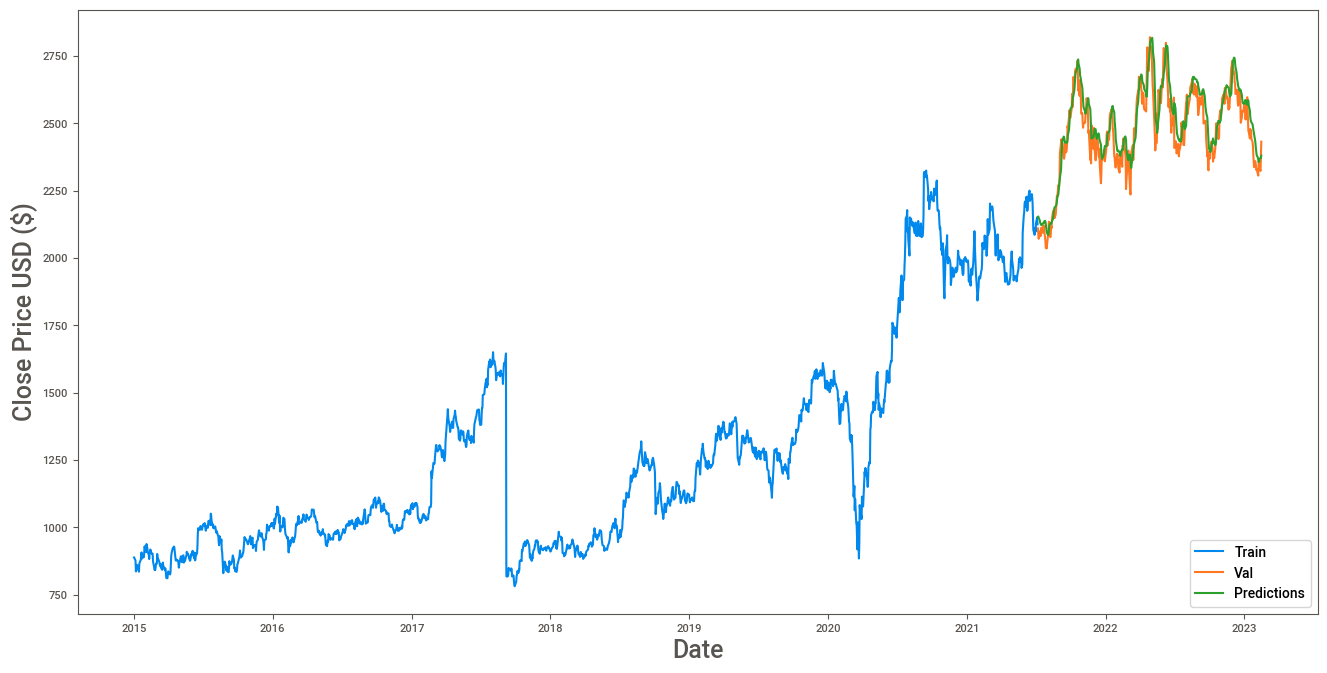

In [ ]:
# Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
# Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2021-07-07,2110.05,2152.456787
2021-07-08,2092.60,2154.003906
2021-07-09,2071.20,2149.646729
2021-07-12,2084.10,2139.336670
2021-07-13,2099.70,2130.956787
...,...,...
2023-02-09,2356.05,2359.322266
2023-02-10,2336.65,2366.988281
2023-02-13,2323.35,2371.348389


In [ ]:
%%writefile app.py
import pandas as  pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import datetime as dt
from datetime import timedelta
from datetime import date

import yfinance as yf
import pandas_datareader as data
from datetime import date
from keras.models import load_model

start=date(2015,1,1)
end=date(2023,2,15)

st.title('Stock Price Prediction')
user_input=st.text_input('Enter Stock Ticker','RELIANCE')
stock_info = yf.Ticker(user_input).info
reliance=data.DataReader(user_input, 'yahoo', start, end)

st.subheader('Data from 2015 to 2023')
st.write(reliance.describe())

#visualization
st.subheader('Closing price Vs Time Chart')
fig=plt.figure(figsize=(12,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(reliance.Close)
st.pyplot(fig)

st.subheader('Closing price Vs Time Chart with 100MA')
ma100=reliance.Close.rolling(100).mean()
fig=plt.figure(figsize=(12,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(ma100)
plt.plot(reliance.Close)
st.pyplot(fig)

st.subheader('Closing price Vs Time Chart with 100MA and 200MA')
ma100=reliance.Close.rolling(100).mean()
ma200=reliance.Close.rolling(200).mean()
fig=plt.figure(figsize=(12,6))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(ma100)
plt.plot(ma200)
plt.plot(reliance.Close)
st.pyplot(fig)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import math
# Create a new dataframe with only Close column
data=reliance.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

# Create the training dataset
# Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]

#load my model
model=load_model('keras_model.h5')

# Create testing dataset
# Create a new array containing 
test_data=scaled_data[training_data_len-60:,:]
# Create the datasets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range (60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

# Convert the data to numpy array
x_test=np.array(x_test)

# Reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

# Plot the data
st.subheader('Predictions Vs Original')
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
# Visualize the data
fig2=plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
st.pyplot(fig2)

st.subheader('Stock Price Prediction by Date')

df1=reliance.reset_index()['Close']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
#datemax="24/06/2022"
datemax=dt.datetime.strftime(dt.datetime.now() - timedelta(1), "%d/%m/%Y")
datemax =dt.datetime.strptime(datemax,"%d/%m/%Y")
x_input=df1[:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

date1 = st.date_input("Enter Date in this format yyyy-mm-dd")

result = st.button("Predict")
#st.write(result)
if result:
    from datetime import datetime
    my_time = datetime.min.time()
    date1 = datetime.combine(date1, my_time)
    #date1=str(date1)
    #date1=dt.datetime.strptime(time_str,"%Y-%m-%d")

    nDay=date1-datemax
    nDay=nDay.days

    date_rng = pd.date_range(start=datemax, end=date1, freq='D')
    date_rng=date_rng[1:date_rng.size]
    lst_output=[]
    n_steps=x_input.shape[1]
    i=0

    while(i<=nDay):
    
         if(len(temp_input)>n_steps):
               #print(temp_input)
                x_input=np.array(temp_input[1:]) 
                print("{} day input {}".format(i,x_input))
                x_input=x_input.reshape(1,-1)
                x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
                yhat = model.predict(x_input, verbose=0)
                print("{} day output {}".format(i,yhat))
                temp_input.extend(yhat[0].tolist())
                temp_input=temp_input[1:]
                #print(temp_input)
                lst_output.extend(yhat.tolist())
                i=i+1
        else:
                x_input = x_input.reshape((1, n_steps,1))
                yhat = model.predict(x_input, verbose=0)
                print(yhat[0])
                temp_input.extend(yhat[0].tolist())
                print(len(temp_input))
                lst_output.extend(yhat.tolist())
                i=i+1
    res =scaler.inverse_transform(lst_output)
#output = res[nDay-1]

output = res[nDay]

st.write("*Predicted Price for Date :*", date1, "*is*", np.round(output[0], 2))
st.success('The Price is {}'.format(np.round(output[0], 2)))

#st.write("predicted price : ",output)

predictions=res[res.size-nDay:res.size]
print(predictions.shape)
predictions=predictions.ravel()
print(type(predictions))
print(date_rng)
print(predictions)
print(date_rng.shape)

@st.cache
def convert_df(df):
    return df.to_csv().encode('utf-8')
df = pd.DataFrame(data = date_rng)
df['Predictions'] = predictions.tolist()
df.columns =['Date','Price']
st.write(df)
csv = convert_df(df)
st.download_button(
   "Press to Download",
   csv,
   "file.csv",
   "text/csv",
   key='download-csv'
   )

  #visualization

    fig =plt.figure(figsize=(10,6))
    xpoints = date_rng
    ypoints =predictions
    plt.xticks(rotation = 90)
    plt.plot(xpoints, ypoints)
    st.pyplot(fig)
